In [1]:
%matplotlib inline
import astropy.io.fits as pyfits
import numpy as np
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style
import subprocess as sp
import scipy.ndimage as sci_nd
import glob
import matplotlib.pyplot as plt
from astropy.table import Table, join, hstack, vstack
import sys
import os
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky


In [2]:
#to easily cycle thru all filters....PART ONE (of3)

def usingfilter(filtername):
    #filter = filtername
    detected_objs_file_table = ascii.read('/data1/rowland/testPSF_{}.cat'.format(filtername))
    image_file = pyfits.open('/data1/rowland/elgordo_{}.fits'.format(filtername))
    segmap_file = pyfits.open('/data1/rowland/segmaps_check/{}_check.fits'.format(filtername))
    data_perfilter = detected_objs_file_table, image_file, segmap_file, filtername
    return(data_perfilter)



filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP","F105W_galfit_test_folder"]
zeropoints = {"F435W":25.665,"F606W":26.493,"F814W":25.97,"F105W":26.2687,"F125W":26.2303,"F140W":24.4524,\
              "F160W":25.9463, "F625W":24.85714771, "F775W":25.66195995, "F850LP":25.89943399}


In [3]:
#to easily cycle thru all filters....PART TWO (of3)

#CHANGE FILTER HERE
############################################################################
data814 = usingfilter(filters[8])
data125 = usingfilter(filters[1])
data435 = usingfilter(filters[4])
data606 = usingfilter(filters[5])

############################################################################
print('Currently using this filter:',data814[3])
print('AND using this filter:',data125[3])
print('AND using this filter:',data435[3])
print('AND using this filter:',data606[3])

Currently using this filter: F814W
AND using this filter: F125W
AND using this filter: F435W
AND using this filter: F606W


In [4]:
#to easily cycle thru all filters....PART THREE (of3)


#defing data for F814W
detected_objs_file814 = data814[0]
image_file814 = data814[1]
segmap_file814 = data814[2]
filtername814 = data814[3]

#defing data for F125W
detected_objs_file125 = data125[0]
image_file125 = data125[1]
segmap_file125 = data125[2]
filtername125 = data125[3]

#defing data for F435W
detected_objs_file435 = data435[0]
image_file435 = data435[1]
segmap_file435 = data435[2]
filtername435 = data435[3]

#defing data for F435W
detected_objs_file606 = data606[0]
image_file606 = data606[1]
segmap_file606 = data606[2]
filtername606 = data606[3]

In [5]:
for i in detected_objs_file125.columns:
    print(i,'next')


NUMBER next
MAG_AUTO next
MAGERR_AUTO next
KRON_RADIUS next
ISOAREA_IMAGE next
XPEAK_IMAGE next
YPEAK_IMAGE next
X_IMAGE next
Y_IMAGE next
ALPHA_J2000 next
DELTA_J2000 next
A_IMAGE next
THETA_IMAGE next
MU_MAX next
ELLIPTICITY next
CLASS_STAR next
FLUX_RADIUS next


# Color-mag diagram 

In [6]:
#defing coords (in degrees already) for filters F814W & F125W

ra_814 = detected_objs_file814['ALPHA_J2000']  #RA
dec_814 = detected_objs_file814['DELTA_J2000'] #DEC
ra_125 = detected_objs_file125['ALPHA_J2000']  #RA
dec_125 = detected_objs_file125['DELTA_J2000'] #DEC
ra_435 = detected_objs_file435['ALPHA_J2000']  #RA
dec_435 = detected_objs_file435['DELTA_J2000'] #DEC
ra_606 = detected_objs_file606['ALPHA_J2000']  #RA
dec_606 = detected_objs_file606['DELTA_J2000'] #DEC
x_814 = detected_objs_file814['XPEAK_IMAGE']
y_814 = detected_objs_file814['YPEAK_IMAGE']
x_125 = detected_objs_file125['XPEAK_IMAGE']
y_125 = detected_objs_file125['YPEAK_IMAGE']

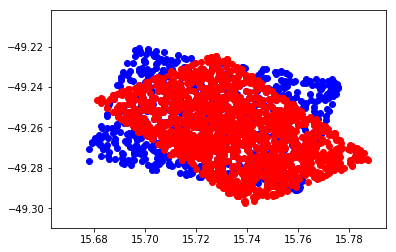

In [7]:
#making sure image regions overlap

plt.scatter(ra_814,dec_814,color='b')
plt.scatter(ra_125,dec_125,color='r')

In [8]:
#matching coords between filters 

c = SkyCoord(ra=ra_814, dec= dec_814) #F814W
catalog_2 = SkyCoord(ra=ra_125, dec=dec_125) #F125W
idx_2, d2d_2,d3d_2 = c.match_to_catalog_sky(catalog_2) #indices of matches, 2d distances, 3d distances
idx2_2, d2d2_2,d3d2_2 = catalog_2.match_to_catalog_sky(c) #not even sure if i use this


In [9]:
#setting max distance of separations to avoid repeats


#setting distance limits 
max_sep = 1.0 * u.arcsec
sep_constraint_2 = d2d_2 < max_sep

#applying distance limits
matched814 = detected_objs_file814[sep_constraint_2]
matched125 = detected_objs_file125[idx_2[sep_constraint_2]]

In [10]:
matched814

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5,18.7218,0.0273,3.66,3414,3384,2383,3384.1494,2382.4834,15.7499584,-49.2872219,15.161,37.36,18.8893,0.584,0.906,9.707
7,21.9778,0.1222,4.27,302,3452,2258,3451.8579,2258.4377,15.748229,-49.2892896,5.116,55.79,21.6237,0.459,0.886,5.217
10,24.8304,0.4547,3.67,20,3319,2253,3319.4229,2252.8057,15.7516131,-49.2893829,1.292,25.36,22.5987,0.176,0.641,1.448
11,25.1621,0.5308,6.38,16,3027,2257,3026.4429,2256.6638,15.7590996,-49.2893171,1.205,10.73,23.6788,0.229,0.454,2.495
13,25.2083,0.5415,4.33,18,3403,2288,3402.9795,2288.1951,15.7494778,-49.2887935,1.259,31.14,23.3781,0.183,0.491,1.773
14,22.8292,0.181,5.19,140,3473,2320,3473.2402,2320.1011,15.7476823,-49.2882619,2.786,-27.11,22.0415,0.117,0.642,4.169
15,25.0154,0.4964,7.15,18,3102,2305,3102.1289,2304.9756,15.7571652,-49.2885123,1.542,48.06,24.3728,0.455,0.363,3.517
19,25.2404,0.5502,8.69,7,3029,2380,3028.8667,2379.7625,15.7590365,-49.2872655,1.105,54.81,24.6555,0.526,0.347,3.613


In [11]:
matched125

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39,18.0328,0.0176,3.5,4464,1667,842,1667.0935,841.7835,15.749971,-49.2872692,15.097,37.13,18.7733,0.523,0.92,9.122
41,20.7399,0.0613,4.03,596,1735,718,1734.6428,717.7128,15.7482455,-49.2893372,6.224,53.38,21.0699,0.379,0.962,5.956
56,23.8194,0.2533,3.62,48,1602,712,1601.8372,711.9873,15.7516392,-49.2894322,1.977,-14.09,22.5887,0.243,0.659,2.388
58,24.3634,0.326,4.9,37,1309,716,1309.2821,716.2742,15.7591148,-49.2893594,1.812,4.54,23.453,0.22,0.416,2.829
62,24.397,0.3311,4.72,38,1686,748,1686.0631,747.6981,15.7494867,-49.2888373,1.993,-6.92,23.6624,0.34,0.415,2.873
61,21.5767,0.0902,4.87,316,1756,780,1756.265,779.5858,15.7476928,-49.2883061,4.003,-33.84,21.7166,0.117,0.946,5.387
67,24.3894,0.3309,8.11,22,1384,763,1384.6782,763.591,15.7571878,-49.2885712,1.891,45.95,24.4728,0.527,0.379,4.629
78,23.8609,0.2592,8.28,25,1312,839,1311.651,840.1699,15.7590532,-49.2872945,2.098,-82.88,24.5051,0.488,0.488,6.041


In [12]:
#defining colors & mag & error variables


# #mags
# mag125 = matched125['MAG_AUTO']
# mag814 = matched814['MAG_AUTO']

# #color
# color_2 = mag125 - mag814

# #errors
# mag125_err = matched125['MAGERR_AUTO']
# mag814_err = matched814['MAGERR_AUTO']
# color_err = np.sqrt(mag125_err**2 + mag814_err**2)

In [13]:
len(matched125), len(matched814)

(842, 842)

In [14]:
#creating a table of matches between filters

ra_f814 = matched814['ALPHA_J2000']
dec_f814 = matched814['DELTA_J2000']
mag_814 = matched814['MAG_AUTO']
mag_125 = matched125['MAG_AUTO']
star_814 = matched814['CLASS_STAR']
star_125 = matched125['CLASS_STAR']
mu_814 = matched814['MU_MAX']
mu_125 = matched125['MU_MAX']
ximg_814 = matched814['XPEAK_IMAGE']
yimg_814 = matched814['YPEAK_IMAGE']
ximg_125 = matched125['XPEAK_IMAGE']
yimg_125 = matched125['YPEAK_IMAGE']

matched_ftable = Table([ximg_814,yimg_814,ximg_125,yimg_125,ra_f814,dec_f814,mag_814,mag_125,star_814,mu_814,star_125,mu_125],names = ('x814','y814','x125','y125','RA_814','DEC_814','MAG_814','MAG_125','CLASS_STAR_814','MU_814','CLASS_STAR_125','MU_125'))
matched_ftable

x814,y814,x125,y125,RA_814,DEC_814,MAG_814,MAG_125,CLASS_STAR_814,MU_814,CLASS_STAR_125,MU_125
pix,pix,pix,pix,deg,deg,mag,mag,,mag / arcsec2,,mag / arcsec2
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
3384,2383,1667,842,15.7499584,-49.2872219,18.7218,18.0328,0.906,18.8893,0.92,18.7733
3452,2258,1735,718,15.748229,-49.2892896,21.9778,20.7399,0.886,21.6237,0.962,21.0699
3319,2253,1602,712,15.7516131,-49.2893829,24.8304,23.8194,0.641,22.5987,0.659,22.5887
3027,2257,1309,716,15.7590996,-49.2893171,25.1621,24.3634,0.454,23.6788,0.416,23.453
3403,2288,1686,748,15.7494778,-49.2887935,25.2083,24.397,0.491,23.3781,0.415,23.6624
3473,2320,1756,780,15.7476823,-49.2882619,22.8292,21.5767,0.642,22.0415,0.946,21.7166
3102,2305,1384,763,15.7571652,-49.2885123,25.0154,24.3894,0.363,24.3728,0.379,24.4728
3029,2380,1312,839,15.7590365,-49.2872655,25.2404,23.8609,0.347,24.6555,0.488,24.5051


Text(0.5,0,'F814W MAG ')

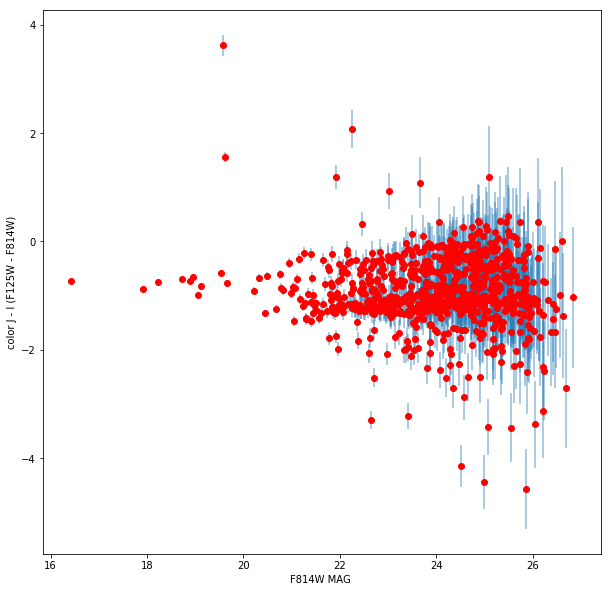

In [15]:
#plotting color/mag using matched table

#mags
mag_125 = matched_ftable['MAG_125']
mag_814 = matched_ftable['MAG_814']

#color
color = mag_125 - mag_814

#errors
mag_125_err = matched125['MAGERR_AUTO']
mag_814_err = matched814['MAGERR_AUTO']
colorerr = np.sqrt(mag_125_err**2 + mag_814_err**2)

plt.figure(figsize=(10,10))
plt.errorbar(mag_814, color, yerr= colorerr, fmt=",",zorder=1,alpha=0.5)
plt.scatter(mag_814, color,color='r',zorder=2)

plt.ylabel('color J - I (F125W - F814W)')
plt.xlabel('F814W MAG ')

In [16]:
#adding color to fitler matched table


matched_ftable['color'] = color
#matched_ftable


In [17]:
#PLOT color mag diagram of 125-814 


# plt.figure(figsize=(10,10))
# plt.errorbar(mag814, color_2, yerr= color_err, fmt=",",zorder=1,alpha=0.5)
# plt.scatter(mag814, color_2,color='r',zorder=2)

# plt.ylabel('color J - I (F125W - F814W)')
# plt.xlabel('F814W MAG ')
# print('number of matches:',len(color_2),'within 1"; out of ',len(matched125),'original matches; \
# and original number of \
# detections in F125W was:',len(ra_125),'original number of detections in F814W was:',len(ra_814))

# Matching photometric data to spectroscopic

In [18]:
spec_data_file = pyfits.open('/data1/rowland/specz_actcl.fit')
#spec_data_file.info() #2 things
spec_data_header = spec_data_file[0].header #image
spec_data = spec_data_file[1].data #data
len(spec_data)#961
spec_data.columns

ColDefs(
    name = 'ACT-CL'; format = '10A'; disp = 'A10'
    name = 'SMH'; format = '18A'; disp = 'A18'
    name = 'RAJ2000'; format = 'D'; unit = 'deg'; disp = 'F10.4'
    name = 'DEJ2000'; format = 'D'; unit = 'deg'; disp = 'F11.5'
    name = 'imag'; format = 'E'; unit = 'mag'; disp = 'F6.3'
    name = 'z'; format = 'D'; disp = 'F8.5'
    name = 'e_z'; format = 'E'; disp = 'F8.5'
    name = 'rcc'; format = 'E'; disp = 'F5.2'
    name = 'MSF'; format = '39A'; disp = 'A39'
    name = 'Simbad'; format = '6A'; disp = 'A6'
    name = 'recno'; format = 'J'; disp = 'I8'
)

In [19]:
len(spec_data)

961

In [20]:
spec_data_header

SIMPLE  =                    T / Standard FITS Format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No Image --- just extension(s)                 
EXTEND  =                    T / There are standard extensions                  
ORIGIN  = 'xml2fits_v1.95'     / Converted from XML-Astrores to FITS            
                         e-mail: question@simbad.u-strasbg.fr                   
COMMENT  ARG='-rm'                                                              
LONGSTRN= 'OGIP 1.0'           / Long string convention (&/CONTINUE) may be used
DATE    = '2019-07-02'         / Written on 2019-07-02:11:09:35 (GMT)           
                             by: apache@vizier.u-strasbg.fr                     
         **********************************************************             
             EXCERPT from catalogues stored in VizieR (CDS)                     
                        with

In [21]:
#making a table of the spectral data

#defing inputs
ra_z_file = spec_data['RAJ2000']
dec_z_file = spec_data['DEJ2000']
z_z_file = spec_data['z']

z_table = Table([ra_z_file,dec_z_file,z_z_file],names=('ra','dec','z'))
len(z_table) #961

#defing inputs
ra_z = z_table['ra']
dec_z = z_table['dec']
z_z = z_table['z']
z_table

ra,dec,z
float64,float64,float64
15.740416666666665,-49.27199999999999,0.8701400000000001
15.757916666666665,-49.27188888888888,0.8689000000000001
15.736666666666665,-49.258194444444435,0.8730500000000001
15.723333333333331,-49.27219444444444,0.8738700000000001
15.752499999999998,-49.28099999999999,0.8746900000000001
15.76458333333333,-49.27358333333333,0.8647700000000001
15.756666666666664,-49.28038888888888,0.8644000000000002
15.746666666666664,-49.25688888888888,0.8764100000000001
15.753749999999998,-49.267083333333325,0.8781200000000001


In [22]:

# c_z = SkyCoord(ra=ra_z*u.deg, dec= dec_z*u.deg) #z


# #setting up to match with only F814W
# catalog_814 = SkyCoord(ra=ra_814, dec=dec_814) #F814W
# #doing matches z & F814
# idx_814, d2d_814, d3d_814 = c_z.match_to_catalog_sky(catalog_814) #indices of matches, 2d distances, 3d distances


# #setting up to match with only F125W
# catalog_125 = SkyCoord(ra=ra_125, dec=dec_125) #F125W
# #doing matches z & F125
# idx_125, d2d_125, d3d_125 = c_z.match_to_catalog_sky(catalog_125) #indices of matches, 2d distances, 3d distances



# #setting up to match spec z data with catalog matched between F814W & F125W
# ra_fmatched = matched814['ALPHA_J2000'] #matched125 has same targets as matched814 but diff index order
# dec_fmatched = matched814['DELTA_J2000']
# c_fmatched = SkyCoord(ra=ra_fmatched, dec= dec_fmatched) #F125 matched to F814
# catalog_z = SkyCoord(ra=ra_z*u.deg, dec=dec_z*u.deg) #z

# #doing matches z & F125&F814 matches
# idx_zmatched, d2d_zmatched, d3d_zmatched = c_fmatched.match_to_catalog_sky(catalog_z) #indices of matches, 2d distances, 3d distances


In [23]:
#setting up matches between z data and filter matches table

ra_fmatched = matched_ftable['RA_814'] #from table of filter matches
dec_fmatched = matched_ftable['DEC_814']
c_fmatched = SkyCoord(ra=ra_fmatched, dec= dec_fmatched) #F125 matched to F814
catalog_z = SkyCoord(ra=ra_z*u.deg, dec=dec_z*u.deg) #from full z table

#doing matches z & F125&F814 matches
idx_zmatched, d2d_zmatched, d3d_zmatched = c_fmatched.match_to_catalog_sky(catalog_z) #indices of matches, 2d distances, 3d distances


In [24]:
#setting distance limits 
max_sep = 1.5 * u.arcsec
#sep_constraint_814 = d2d_814 < max_sep
#sep_constraint_125 = d2d_125 < max_sep
sep_constraint_zmatched = d2d_zmatched < max_sep


#applying distance limits
# matched814_z = spec_data[sep_constraint_814] #c table
# matchedz_814 = detected_objs_file814[idx_814[sep_constraint_814]] #catalog table

# matched125_z = spec_data[sep_constraint_125]
# matchedz_125 = detected_objs_file125[idx_125[sep_constraint_125]]

matched_fz = matched_ftable[sep_constraint_zmatched] #814 table of matches with 125 that also match z
matched_zf = z_table[idx_zmatched[sep_constraint_zmatched]] #only z_table that matches filtermatches table



In [25]:
matched_fz

x814,y814,x125,y125,RA_814,DEC_814,MAG_814,MAG_125,CLASS_STAR_814,MU_814,CLASS_STAR_125,MU_125,color
pix,pix,pix,pix,deg,deg,mag,mag,,mag / arcsec2,,mag / arcsec2,mag
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3452,2258,1735,718,15.748229,-49.2892896,21.9778,20.7399,0.886,21.6237,0.962,21.0699,-1.2378999999999998
3140,2518,1423,977,15.7561835,-49.2849682,22.0603,20.751,0.789,21.3498,0.954,20.8422,-1.3093000000000004
3922,2735,2204,1194,15.7362296,-49.2813567,21.4948,20.3646,0.927,21.0947,0.974,20.6003,-1.130200000000002
3262,2758,1545,1218,15.7530848,-49.2809599,21.0512,19.5834,0.677,21.4227,0.918,20.7875,-1.4678000000000004
3923,2720,2204,1194,15.7361884,-49.281592,24.5105,20.3646,0.352,24.2078,0.974,20.6003,-4.145900000000001
3042,2779,1325,1239,15.7586846,-49.2806123,23.088,21.839,0.638,22.261,0.921,21.8593,-1.2490000000000023
3098,2799,1381,1259,15.7572604,-49.2802703,22.8781,21.7786,0.652,21.8446,0.94,21.5819,-1.099499999999999
3740,3302,2022,1761,15.7408639,-49.2719007,19.1243,18.2959,0.926,20.0918,0.126,19.8029,-0.828400000000002


In [26]:
#see amounts of matches for each before more analysis
#print(len(matched814_z),len(matchedz_814),len(matched125_z),len(matchedz_125),len(matchedz_matched),len(matchedmatched_z))
len(matched_zf),len(matched_fz)

(53, 53)

In [27]:
#need to match tables


# #defining pts with z
# ra_withspec = matched_fz['ALPHA_J2000'] #matched table
# dec_withspec = matched_fz['DELTA_J2000'] #matched table


# #creating table of matches with spectral z
# ra_zmatches = matched_zf['ra'] #from ztable
# dec_zmatches = matched_zf['dec'] #from ztable
# z_zmatches = matched_zf['z'] #from ztable

# z_table_matches = Table([ra_zmatches,dec_zmatches,z_zmatches],names = ('RA','DEC','Z'))
# z_table_matches

In [28]:
#setting up inputs to plot data with z

#making one table of fitler matches that have z data
matched814125_withz = hstack([matched_fz, matched_zf]) #originally 125table
#matched814table_withz = hstack([matchedz_814, z_table_matches]) #originally 814 table?????? nope, z table

#len(matched125table_withz), len(matched814table_withz)
#matched814table_withz #only 31 in length for rows with all values, z values only for extra 8 rows


#using that data to get colors/mags of objects with a z
mag125_withz = matched814125_withz['MAG_125']
mag814_withz = matched814125_withz['MAG_814']

# #color
color_z = mag125_withz - mag814_withz


In [29]:
matched814125_withz

x814,y814,x125,y125,RA_814,DEC_814,MAG_814,MAG_125,CLASS_STAR_814,MU_814,CLASS_STAR_125,MU_125,color,ra,dec,z
pix,pix,pix,pix,deg,deg,mag,mag,,mag / arcsec2,,mag / arcsec2,mag,,,
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3452,2258,1735,718,15.748229,-49.2892896,21.9778,20.7399,0.886,21.6237,0.962,21.0699,-1.2378999999999998,15.747916666666665,-49.28938888888888,0.8711600000000002
3140,2518,1423,977,15.7561835,-49.2849682,22.0603,20.751,0.789,21.3498,0.954,20.8422,-1.3093000000000004,15.755833333333332,-49.284972222222216,0.8748100000000001
3922,2735,2204,1194,15.7362296,-49.2813567,21.4948,20.3646,0.927,21.0947,0.974,20.6003,-1.130200000000002,15.735833333333332,-49.281388888888884,0.8571300000000002
3262,2758,1545,1218,15.7530848,-49.2809599,21.0512,19.5834,0.677,21.4227,0.918,20.7875,-1.4678000000000004,15.752499999999998,-49.28099999999999,0.8746900000000001
3923,2720,2204,1194,15.7361884,-49.281592,24.5105,20.3646,0.352,24.2078,0.974,20.6003,-4.145900000000001,15.735833333333332,-49.281388888888884,0.8571300000000002
3042,2779,1325,1239,15.7586846,-49.2806123,23.088,21.839,0.638,22.261,0.921,21.8593,-1.2490000000000023,15.758333333333331,-49.280694444444435,0.8805100000000001
3098,2799,1381,1259,15.7572604,-49.2802703,22.8781,21.7786,0.652,21.8446,0.94,21.5819,-1.099499999999999,15.756666666666664,-49.28038888888888,0.8644000000000002
3740,3302,2022,1761,15.7408639,-49.2719007,19.1243,18.2959,0.926,20.0918,0.126,19.8029,-0.828400000000002,15.740416666666665,-49.27199999999999,0.8701400000000001


Text(0.5,0,'F814W MAG ')

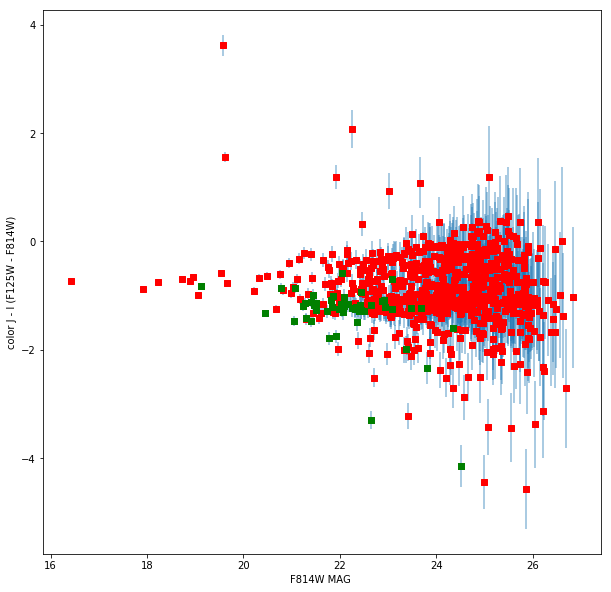

In [30]:
#plotting detections with spectral redshifts




#plotting
plt.figure(figsize=(10,10))
plt.errorbar(mag_814,color, yerr= colorerr, fmt=",",zorder=1,alpha=0.5)
plt.scatter(mag_814, color,marker = ',', color='r',zorder=2)
plt.scatter(mag814_withz, color_z, marker = ',',color='g',zorder=3)
plt.ylabel('color J - I (F125W - F814W)')
plt.xlabel('F814W MAG ')

#plt.savefig('color_mag_diagram_with_spec_z')

In [31]:
#cutting z table

shortz = spec_data[(spec_data['ACT-CL']=='J0102-4915')]
len(shortz)
shortz.columns
shortraz = shortz['RAJ2000']
shortdecz = shortz['DEJ2000']

RED = matches from both filters with Z
GREEN = spectral z data points
MAGENTA = F814 data points
BLUE = F125 data points
YELLOW = matches between F125 & F814
CYAN = F606W data points


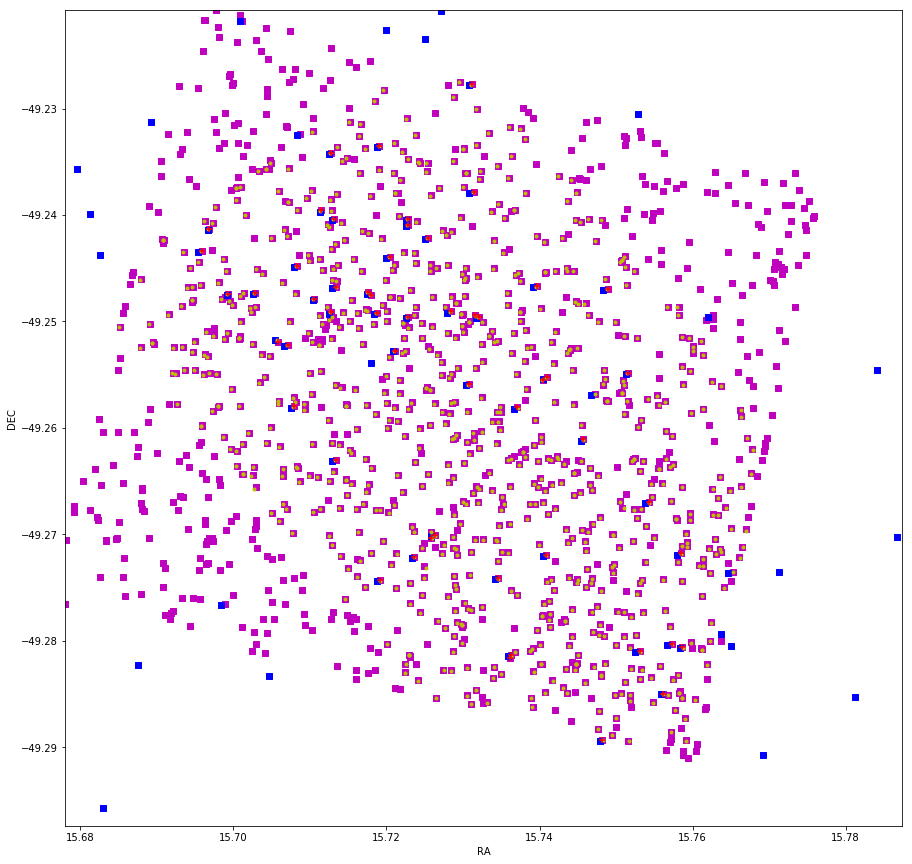

In [32]:
#this plot confirms # of overlap data is reasonable....PART ONE (of 2)



#z data was wider view so seeing how many overlaps to expect
plt.figure(figsize=(15,15))
plt.scatter(ra_z,dec_z,color='g',marker='.')# marker was ,
plt.scatter(ra_814,dec_814, color='m',marker=',')# marker was .
#plt.scatter(ra_125,dec_125,color='b',marker=',')# marker was .
#plt.scatter(ra_435,dec_435,color='cyan',marker=',')# marker was .
plt.scatter(shortraz,shortdecz,color='b',marker=',')

plt.scatter(matched125['ALPHA_J2000'],matched125['DELTA_J2000'],marker='.',color='y') #marker was ,
plt.scatter(matched814125_withz['RA_814'],matched814125_withz['DEC_814'],marker='+',color='r')


#matched125
plt.xlabel('RA')
plt.ylabel('DEC')

#use below to zoom on area that overlaps hst photometric data region
plt.ylim(np.min(dec_125),np.max(dec_814))
plt.xlim(np.min(ra_814),np.max(ra_125))

#broader zoom of above zoom
##plt.ylim(-49.32,-49.2)
##plt.xlim(15.6,15.9)

#plt.savefig('z_hst_regions')


#zoom to those weird matches
# plt.ylim(-49.249,-49.25)
# plt.xlim(15.731,15.733)

#random one for play
#plt.ylim(-49.285,-49.275)
#plt.xlim(15.75,15.76)

print('RED = matches from both filters with Z')
print('GREEN = spectral z data points')
print('MAGENTA = F814 data points')
print('BLUE = F125 data points')
print('YELLOW = matches between F125 & F814')
print('CYAN = F606W data points')

In [33]:
#this analysis of plot confirms # of overlap data is reasonable....PART TWO (of 2)


# # expected = np.where((ra_z >=15.6) & (ra_z<=15.9)) #returns indices of values within that criteria
# # len(expected[0]) #so 89 detections within hst photometric data but can easily eyeball 30 outside hst region
# # #ra_z
# expected2 = z_table[np.where((z_table['ra'] >=np.min(ra_814)) & (z_table['ra'] <= np.max(ra_125)) \
#                              & (z_table['dec'] >=np.min(dec_125)) & (z_table['dec'] <= np.max(dec_814)))]

# expected2 #73
# print('so max number of matching detected sources with spectral z is: ', len(expected2) ,', based on within ra & dec mins/maxs of F814&F125 filter regions in above plot')
# print('but at least 15 green points(aka spec_z datapoints) clearly outside fields/wont match with any hst data')

# Identifying Stars in above detections

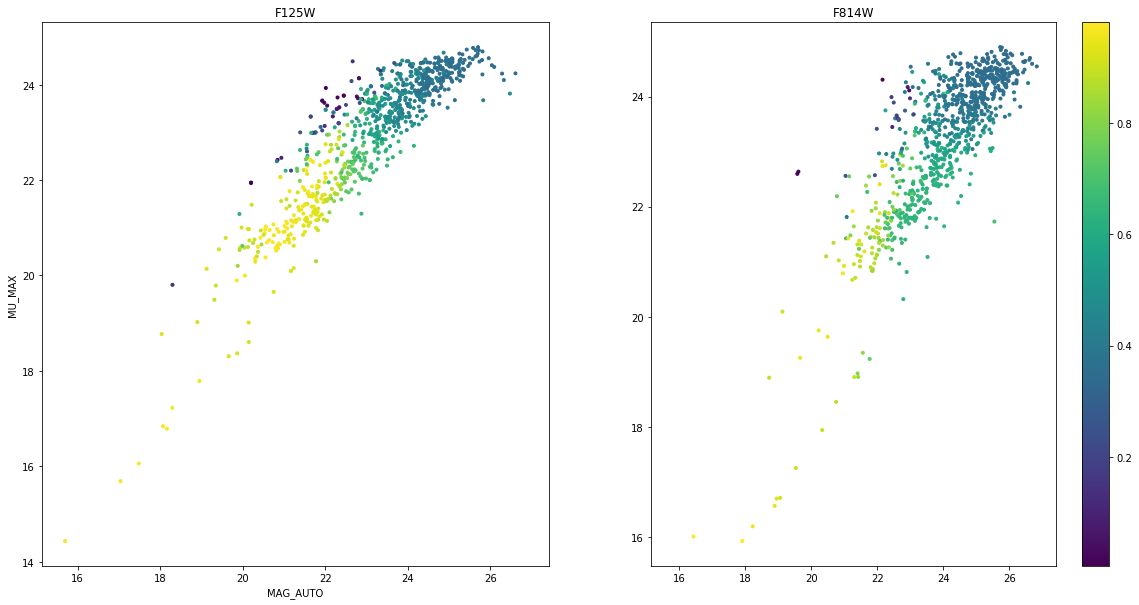

In [34]:
#stars in dataset matched between filters 


mu_125 = matched125['MU_MAX']
mu_814 = matched814['MU_MAX']
mag_125_2 = matched125['MAG_AUTO']
mag_814_2 = matched814['MAG_AUTO']
star_125_2 = matched125['CLASS_STAR']
star_814_2 = matched814['CLASS_STAR']


f, (ax1, ax2) = plt.subplots(1, 2,sharex=True, figsize=(20,10))
S = ax1.scatter(mag_125_2,mu_125,c=star_125_2,marker='.')
ax1.set_title('F125W')
ax2.scatter(mag_814_2,mu_814,c=star_814_2,marker='.' )
ax2.set_title('F814W')
ax1.set_xlabel('MAG_AUTO')
ax1.set_ylabel('MU_MAX')
plt.colorbar(S,ax=ax2)

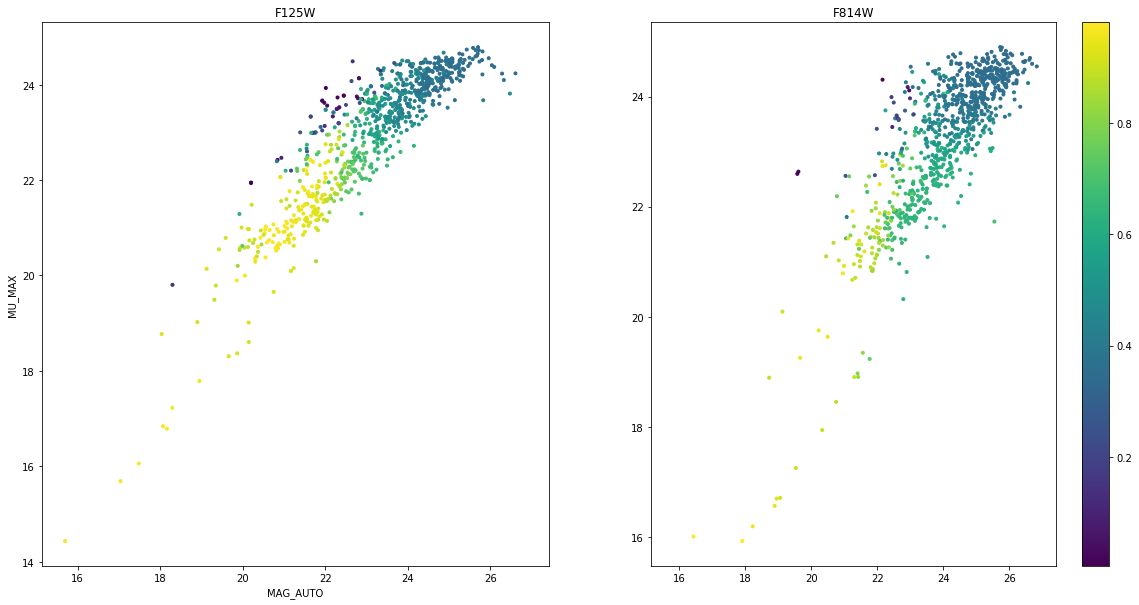

In [35]:
#should be same as above

#bt = bigtable
mu_125_bt = matched_ftable['MU_125']
mu_814_bt = matched_ftable['MU_814']
mag_125_bt = matched_ftable['MAG_125']
mag_814_bt = matched_ftable['MAG_814']
star_125_bt = matched_ftable['CLASS_STAR_125']
star_814_bt = matched_ftable['CLASS_STAR_814']


f, (ax1, ax2) = plt.subplots(1, 2,sharex=True, figsize=(20,10))
SS = ax1.scatter(mag_125_bt,mu_125_bt,c=star_125_bt,marker='.')
ax1.set_title('F125W')
ax2.scatter(mag_814_bt,mu_814_bt,c=star_814_bt,marker='.' )
ax2.set_title('F814W')
ax1.set_xlabel('MAG_AUTO')
ax1.set_ylabel('MU_MAX')
plt.colorbar(SS,ax=ax2)

In [36]:
#removing stars based on above plots

#these are cuts
stars_inmatchedfttable = matched_ftable[(matched_ftable['MAG_814']<20) & (matched_ftable['MU_814']<18)]

secondcut = matched_ftable[(matched_ftable['MAG_125']<20) & (matched_ftable['MU_125']<18)]

stars_inmatchedfttable
# stars_inmatchedfttable = secondcut[second]
# stars_inmatchedfttable

# #setting up stars to plot on color/mag diagram
star_mag_814 = stars_inmatchedfttable['MAG_814']
star_mag_125 = stars_inmatchedfttable['MAG_125']
star_color = star_mag_125 - star_mag_814


In [37]:
#searching

In [38]:
secondcut #produces teh same as one, this is a good sign b/c these 7 are most likely stars

x814,y814,x125,y125,RA_814,DEC_814,MAG_814,MAG_125,CLASS_STAR_814,MU_814,CLASS_STAR_125,MU_125,color
pix,pix,pix,pix,deg,deg,mag,mag,,mag / arcsec2,,mag / arcsec2,mag
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4555,2798,2834,1258,15.7200537,-49.2802933,19.5287,18.9482,0.923,17.2495,0.957,17.7876,-0.5805000000000007
4757,3635,3044,2097,15.714877,-49.2663375,17.9097,17.0365,0.999,15.9221,0.971,15.6891,-0.8732000000000006
5086,3744,3375,2204,15.7064794,-49.2645259,18.9494,18.2904,0.946,16.6936,0.969,17.227,-0.6589999999999989
4274,4389,2561,2849,15.7272397,-49.2537819,16.4299,15.6926,1.0,16.0015,0.973,14.4326,-0.7372999999999994
4471,4438,2759,2899,15.7221864,-49.2529626,18.8885,18.1611,0.96,16.5616,0.971,16.7883,-0.7273999999999994
4323,4588,2610,3048,15.725982,-49.2504706,18.2228,17.4794,0.971,16.1888,0.974,16.0575,-0.7434000000000012
3915,5549,2203,4010,15.7363972,-49.2344484,19.0547,18.0667,0.938,16.7061,0.97,16.8405,-0.9879999999999995


Text(0.5,0,'F814W MAG ')

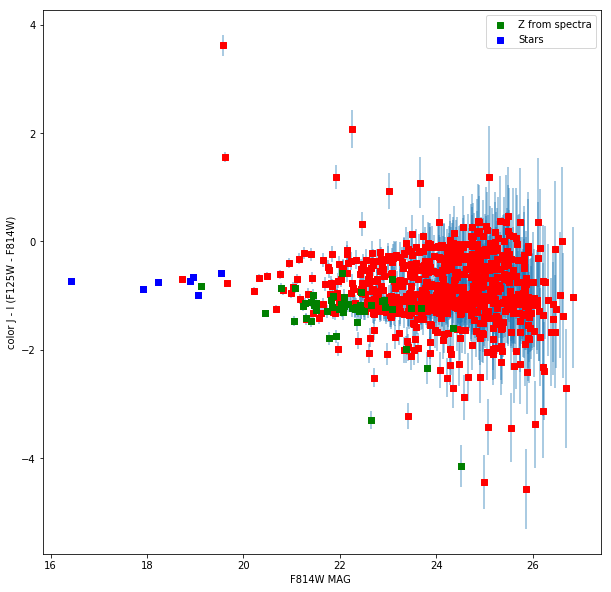

In [39]:

#plotting
plt.figure(figsize=(10,10))
plt.errorbar(mag_814,color, yerr= colorerr, fmt=",",zorder=1,alpha=0.5)
plt.scatter(mag_814, color,marker = ',', color='r',zorder=2)
hasZ = plt.scatter(mag814_withz, color_z, marker = ',',color='g',zorder=3, label = 'Z from spectra')
stars = plt.scatter(star_mag_814, star_color, marker = ',',color='b',zorder=4, label = 'Stars')
plt.legend(handles=[hasZ, stars])
plt.ylabel('color J - I (F125W - F814W)')
plt.xlabel('F814W MAG ')

# Still looks like stars so additional checks

In [40]:
#trying to implement additional cuts

searching = matched_ftable[(matched_ftable['MAG_814']<20)] #broader table of 12 based on above graph, includes known 7 stars
firstrow = searching[0]
secondrow = searching[10]



#based on values adding first and 11th rows from searching table to stars table
new_startable = vstack([stars_inmatchedfttable,firstrow])
finalstars = vstack([new_startable, secondrow])

finalstars


x814,y814,x125,y125,RA_814,DEC_814,MAG_814,MAG_125,CLASS_STAR_814,MU_814,CLASS_STAR_125,MU_125,color
pix,pix,pix,pix,deg,deg,mag,mag,,mag / arcsec2,,mag / arcsec2,mag
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4555,2798,2834,1258,15.7200537,-49.2802933,19.5287,18.9482,0.923,17.2495,0.957,17.7876,-0.5805000000000007
4757,3635,3044,2097,15.714877,-49.2663375,17.9097,17.0365,0.999,15.9221,0.971,15.6891,-0.8732000000000006
5086,3744,3375,2204,15.7064794,-49.2645259,18.9494,18.2904,0.946,16.6936,0.969,17.227,-0.6589999999999989
4274,4389,2561,2849,15.7272397,-49.2537819,16.4299,15.6926,1.0,16.0015,0.973,14.4326,-0.7372999999999994
4471,4438,2759,2899,15.7221864,-49.2529626,18.8885,18.1611,0.96,16.5616,0.971,16.7883,-0.7273999999999994
4323,4588,2610,3048,15.725982,-49.2504706,18.2228,17.4794,0.971,16.1888,0.974,16.0575,-0.7434000000000012
3915,5549,2203,4010,15.7363972,-49.2344484,19.0547,18.0667,0.938,16.7061,0.97,16.8405,-0.9879999999999995
3384,2383,1667,842,15.7499584,-49.2872219,18.7218,18.0328,0.906,18.8893,0.92,18.7733,-0.6890000000000001


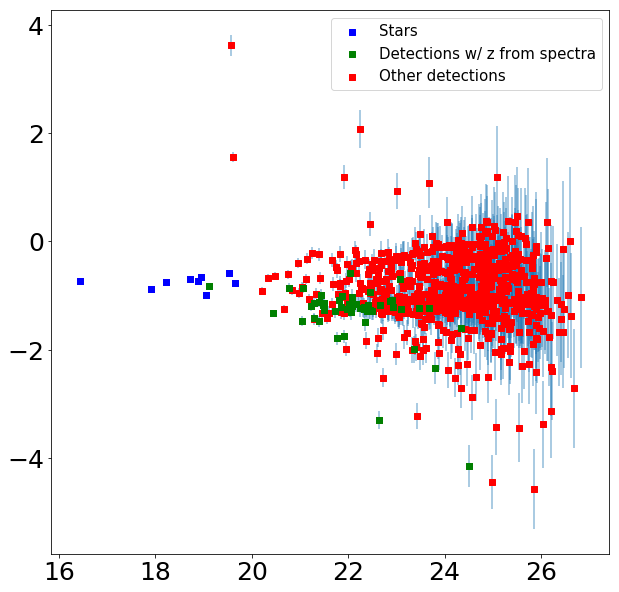

In [45]:

star_mag_814_final = finalstars['MAG_814']
star_color_final = finalstars['color']

#plotting
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(10,10))
plt.errorbar(mag_814,color, yerr= colorerr, fmt=",",zorder=1,alpha=0.5)
others = plt.scatter(mag_814, color,marker = ',', color='r',zorder=2,label='Other detections')
hasZ = plt.scatter(mag814_withz, color_z, marker = ',',color='g',zorder=3, label = 'Detections w/ z from spectra')
stars = plt.scatter(star_mag_814_final, star_color_final, marker = ',',color='b',zorder=4, label = 'Stars')
plt.legend(handles=[stars,hasZ, others],prop={'size': 15})
#plt.ylabel('color J - I (F125W - F814W)')
#plt.xlabel('F814W MAG ')
#plt.savefig('color_mag_withstarsandz')
plt.savefig('/data1/rowland/Figures/color_mag_withstarsandz')

In [43]:
interestingpoints = vstack([searching[6],searching[9]])
interestingpoints

x814,y814,x125,y125,RA_814,DEC_814,MAG_814,MAG_125,CLASS_STAR_814,MU_814,CLASS_STAR_125,MU_125,color
pix,pix,pix,pix,deg,deg,mag,mag,,mag / arcsec2,,mag / arcsec2,mag
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4953,4552,3242,3012,15.7098707,-49.2510523,19.5747,23.1948,0.011,22.594,0.665,22.6473,3.6201000000000008
4774,4665,3062,3126,15.7142851,-49.2491452,19.6074,21.1675,0.0,22.6348,0.19,22.1977,1.560100000000002


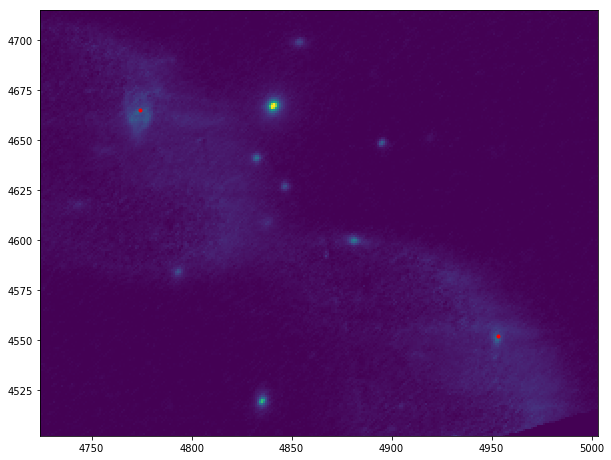

In [44]:
#plt.scatter(interestingpoints['x814'],interestingpoints['y814'])
plt.figure(figsize=(10,10))
plt.imshow(image_file814[0].data,vmin=0,vmax=1)
plt.xlim((np.min(interestingpoints['x814'])-50),np.max(interestingpoints['x814'])+50)
plt.ylim((np.min(interestingpoints['y814'])-50),np.max(interestingpoints['y814'])+50)
plt.scatter(interestingpoints['x814'],interestingpoints['y814'],marker='.',color='r')

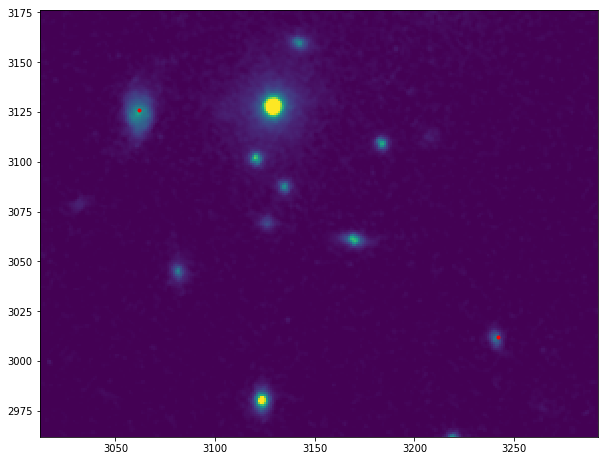

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(image_file125[0].data,vmin=0,vmax=1)
plt.xlim((np.min(interestingpoints['x125'])-50),np.max(interestingpoints['x125'])+50)
plt.ylim((np.min(interestingpoints['y125'])-50),np.max(interestingpoints['y125'])+50)
plt.scatter(interestingpoints['x125'],interestingpoints['y125'],marker='.',color='r')

In [46]:
matched814125_withz

x814,y814,x125,y125,RA_814,DEC_814,MAG_814,MAG_125,CLASS_STAR_814,MU_814,CLASS_STAR_125,MU_125,color,ra,dec,z
pix,pix,pix,pix,deg,deg,mag,mag,,mag / arcsec2,,mag / arcsec2,mag,,,
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3452,2258,1735,718,15.748229,-49.2892896,21.9778,20.7399,0.886,21.6237,0.962,21.0699,-1.2378999999999998,15.747916666666665,-49.28938888888888,0.8711600000000002
3140,2518,1423,977,15.7561835,-49.2849682,22.0603,20.751,0.789,21.3498,0.954,20.8422,-1.3093000000000004,15.755833333333332,-49.284972222222216,0.8748100000000001
3922,2735,2204,1194,15.7362296,-49.2813567,21.4948,20.3646,0.927,21.0947,0.974,20.6003,-1.130200000000002,15.735833333333332,-49.281388888888884,0.8571300000000002
3262,2758,1545,1218,15.7530848,-49.2809599,21.0512,19.5834,0.677,21.4227,0.918,20.7875,-1.4678000000000004,15.752499999999998,-49.28099999999999,0.8746900000000001
3923,2720,2204,1194,15.7361884,-49.281592,24.5105,20.3646,0.352,24.2078,0.974,20.6003,-4.145900000000001,15.735833333333332,-49.281388888888884,0.8571300000000002
3042,2779,1325,1239,15.7586846,-49.2806123,23.088,21.839,0.638,22.261,0.921,21.8593,-1.2490000000000023,15.758333333333331,-49.280694444444435,0.8805100000000001
3098,2799,1381,1259,15.7572604,-49.2802703,22.8781,21.7786,0.652,21.8446,0.94,21.5819,-1.099499999999999,15.756666666666664,-49.28038888888888,0.8644000000000002
3740,3302,2022,1761,15.7408639,-49.2719007,19.1243,18.2959,0.926,20.0918,0.126,19.8029,-0.828400000000002,15.740416666666665,-49.27199999999999,0.8701400000000001


# trying to get photometric z for those with z from spectra


In [47]:
#matching filterswithz data with F435


#matching coords between filters
ra_fz = matched814125_withz['ra'] *u.deg
dec_fz = matched814125_withz['dec'] *u.deg

c_fz = SkyCoord(ra=ra_fz, dec= dec_fz) #Filter matched table
catalog_606 = SkyCoord(ra=ra_606, dec=dec_606) #F125W
idx_fz606, d2d_fz606, d3d_fz606 = c_fz.match_to_catalog_sky(catalog_606) #indices of matches, 2d distances, 3d distances

#setting max distance of separations to avoid repeats


#setting distance limits 
max_sep_fz606 = 1.5 * u.arcsec
sep_constraint_fz606 = d2d_fz606 < max_sep_fz606

#applying distance limits
matched_fz606 = matched814125_withz[sep_constraint_fz606]
matched_606fz = detected_objs_file606[idx_fz606[sep_constraint_fz606]]
matched_606fz

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
868,24.615,0.3237,6.2,69,3453,2259,3452.6106,2259.0583,15.7482097,-49.2892792,2.501,41.81,23.8787,0.33,0.616,4.679
1068,24.8595,0.3622,4.99,62,3141,2518,3141.0649,2518.1384,15.7561685,-49.2849598,2.168,-64.42,23.581,0.242,0.641,3.005
1234,24.0891,0.254,5.34,111,3922,2735,3922.1104,2734.7336,15.7362119,-49.2813524,3.096,46.9,23.4071,0.37,0.653,4.141
1257,24.1487,0.2612,6.78,92,3262,2759,3262.5659,2758.6011,15.7530623,-49.2809527,2.818,77.96,24.0406,0.26,0.547,6.661
1234,24.0891,0.254,5.34,111,3922,2735,3922.1104,2734.7336,15.7362119,-49.2813524,3.096,46.9,23.4071,0.37,0.653,4.141
1285,25.8258,0.5655,6.97,21,3043,2780,3042.8149,2779.4121,15.7586765,-49.2806047,1.242,38.27,24.7299,0.117,0.439,3.446
1298,25.554,0.4988,5.4,33,3099,2800,3098.7715,2800.0017,15.7572467,-49.2802619,1.845,19.7,24.0235,0.393,0.553,2.684
1646,23.5756,0.2005,5.63,145,3756,3302,3756.4282,3302.3508,15.7404432,-49.2718919,4.114,-1.02,23.7018,0.401,0.647,7.205


Text(0,0.5,'color B - J (F606W - F125W) ')

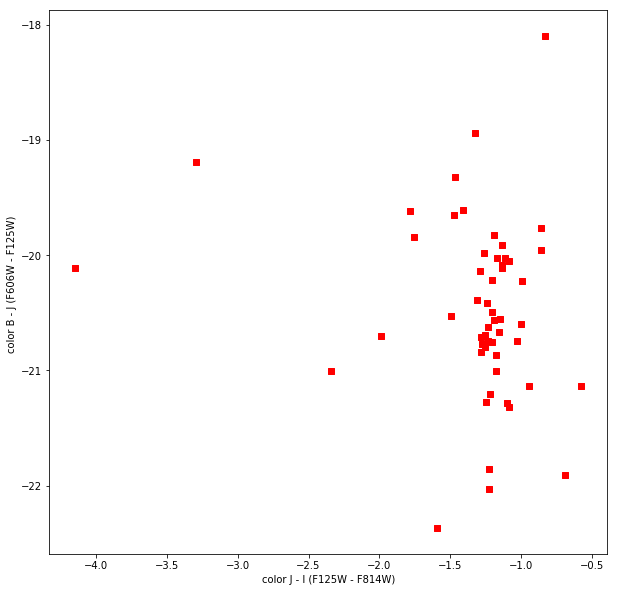

In [48]:
#for reference
#mag125_withz = matched814125_withz['MAG_125']
#mag814_withz = matched814125_withz['MAG_814']
#color_z = mag125_withz - mag814_withz

mag606_withz = matched_606fz['MAGERR_AUTO']
color_606z =  mag606_withz - mag125_withz

#plotting
plt.figure(figsize=(10,10))
#plt.errorbar(mag_814,color, yerr= colorerr, fmt=",",zorder=1,alpha=0.5)
plt.scatter(color_z, color_606z,marker = ',', color='r')#,zorder=2)
#hasZ = plt.scatter(mag814_withz, color_z, marker = ',',color='g',zorder=3, label = 'has Z from spectra')
#stars = plt.scatter(star_mag_814_final, star_color_final, marker = ',',color='b',zorder=4, label = 'Stars')
#plt.legend(handles=[hasZ, stars])
plt.xlabel('color J - I (F125W - F814W)')
plt.ylabel('color B - J (F606W - F125W) ')
#plt.savefig('color_mag_withstarsandz')

Text(0.5,0,'color I - J (F814W - F125W) ')

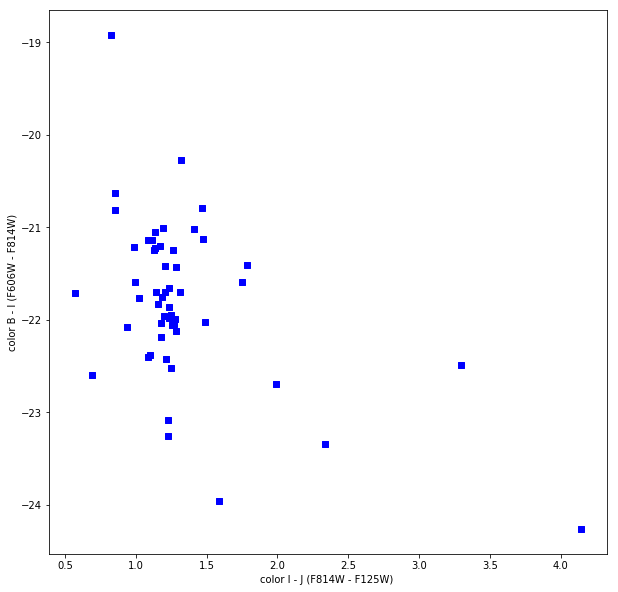

In [49]:
color_BI = mag606_withz - mag814_withz

color_IJ =  mag814_withz - mag125_withz

#plotting
plt.figure(figsize=(10,10))
plt.scatter(color_IJ, color_BI,marker = ',', color='b')#,zorder=2)
plt.ylabel('color B - I (F606W - F814W)')
plt.xlabel('color I - J (F814W - F125W) ')

Text(0,0.5,'magnitude F814W')

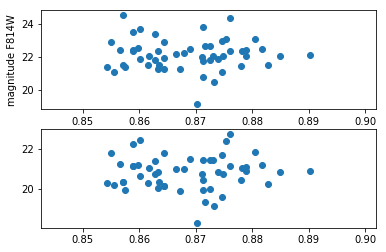

In [50]:
#many explorations


#trying to sum flux per filter to get a bb spec?
#But also how to do this per target???
#come back to later


#plot z's just to see where they are

fz = matched814125_withz['z']
magfz814 = matched814125_withz['MAG_814']
magfz125 = matched814125_withz['MAG_125']


fig, (ax0, ax1) = plt.subplots(2,1)#,figsize=(8,8))
#plt.figure(figsize=(10,10))
ax0.scatter(fz,magfz814)
ax1.scatter(fz,magfz125)
ax0.set_xlabel('redshift')
ax0.set_ylabel('magnitude F814W')